In [1]:
import pandas as pd
import numpy as np

# --- Your health dataset ---
df = pd.read_csv("/Users/janak/Downloads/merged_health_census_clean.csv",
                 dtype={"Tract_FIPS_full": str})
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Race_Total,Pct_White_Alone,Pct_Black_Alone,Pct_Asian_Alone,Majority_Race_Clean,Pct_Hispanic,Pct_Other
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,06037206032,5275,29.5,1556.0,15.5,...,309,4.823990,185,5133,58.620690,0.935126,16.637444,Hispanic,77.089421,23.806741
1,CA,Pasadena,656000,6037462001,0656000-06037462001,06037462001,3974,32.0,1272.0,11.6,...,367,5.752670,167,3893,48.548677,10.608785,9.915232,Hispanic,70.459800,30.927305
2,CA,Fullerton,628000,6059011504,0628000-06059011504,06059011504,5473,18.7,1023.0,4.6,...,873,6.832522,379,6024,61.636786,1.626826,23.090969,White,30.378486,13.645418
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,201,4.592980,123,3170,82.965300,9.589905,3.470032,White,7.350158,3.974763
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,594,9.886264,339,4030,73.374690,11.116625,5.831266,White,8.263027,9.677419


In [2]:
print(df['Majority_Race_Clean'].value_counts(dropna=False).head(10))


Majority_Race_Clean
White       18173
Black        4541
Hispanic     3483
Asian         824
Other          92
Name: count, dtype: int64


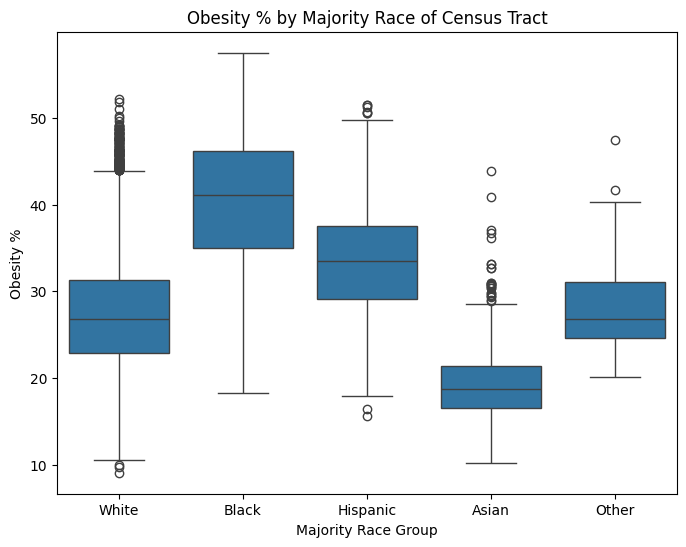

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to the common majority groups
common_groups = ['White','Black', 'Hispanic','Asian', 'NHPI','Other']
df_plot = df[df['Majority_Race_Clean'].isin(common_groups)]

plt.figure(figsize=(8,6))
sns.boxplot(data=df_plot, x='Majority_Race_Clean', y='Obesity_Pct',
            order=['White','Black', 'Hispanic', 'Asian','Other'])
# sns.stripplot(data=df_plot, x='Majority_Race_Clean', y='Obesity_Pct',
#               order=['White','Black','Asian', 'NHPI','Other'],
#               color='black', size=1, alpha=0.3)

plt.title("Obesity % by Majority Race of Census Tract")
plt.xlabel("Majority Race Group")
plt.ylabel("Obesity %")
plt.show()


/var/folders/kt/_bzbz3vd5qbcfjnt5vssmqxh0000gn/T/ipykernel_60192/1425321487.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Majority_Race_Clean', y='Obesity_Pct',


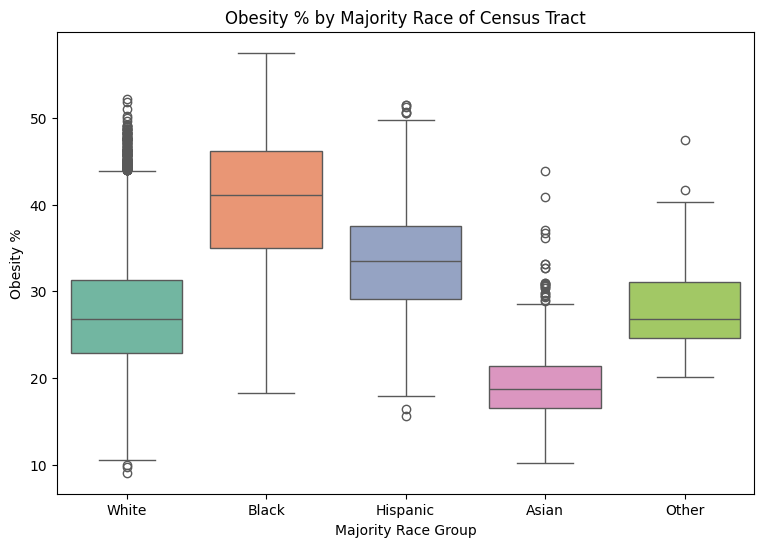

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Collapse small groups into "Other"
df['Majority_Race_Clean'] = df['Majority_Race_Clean'].replace(
    {'TwoPlus':'Other','NHPI':'Other'}
)

common_groups = ['White','Black','Hispanic','Asian','Other']  # if you’ve already added % Hispanic
if 'Hispanic' not in df['Majority_Race_Clean'].unique():
    common_groups = ['White','Black','Asian','Other']

df_plot = df[df['Majority_Race_Clean'].isin(common_groups)]

plt.figure(figsize=(9,6))
sns.boxplot(data=df_plot, x='Majority_Race_Clean', y='Obesity_Pct',
            order=common_groups, palette='Set2')
# sns.stripplot(data=df_plot, x='Majority_Race_Clean', y='Obesity_Pct',
#               order=common_groups, color='black', size=1, alpha=0.3)

plt.title("Obesity % by Majority Race of Census Tract")
plt.xlabel("Majority Race Group")
plt.ylabel("Obesity %")
plt.show()


/var/folders/kt/_bzbz3vd5qbcfjnt5vssmqxh0000gn/T/ipykernel_60192/721125363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Majority_Race_Clean', y='Diabetes_Pct',


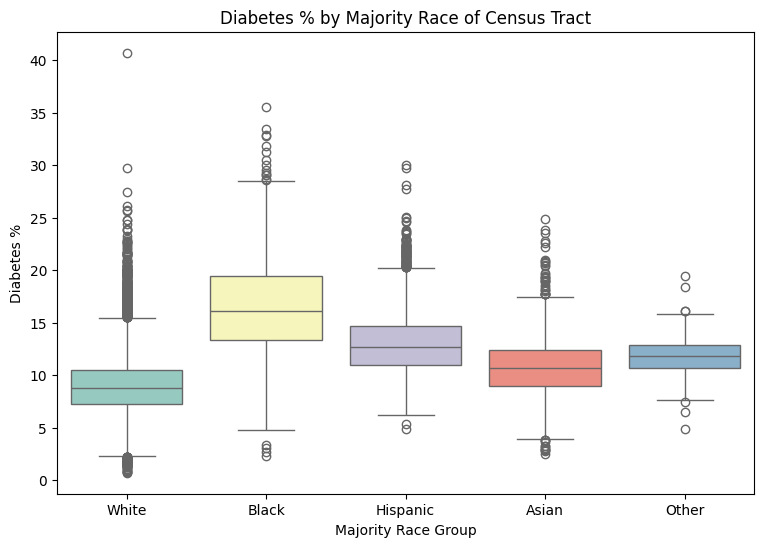

In [12]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df_plot, x='Majority_Race_Clean', y='Diabetes_Pct',
            order=common_groups, palette='Set3')
# sns.stripplot(data=df_plot, x='Majority_Race_Clean', y='Diabetes_Pct',
#               order=common_groups, color='black', size=1, alpha=0.3)

plt.title("Diabetes % by Majority Race of Census Tract")
plt.xlabel("Majority Race Group")
plt.ylabel("Diabetes %")
plt.show()


/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


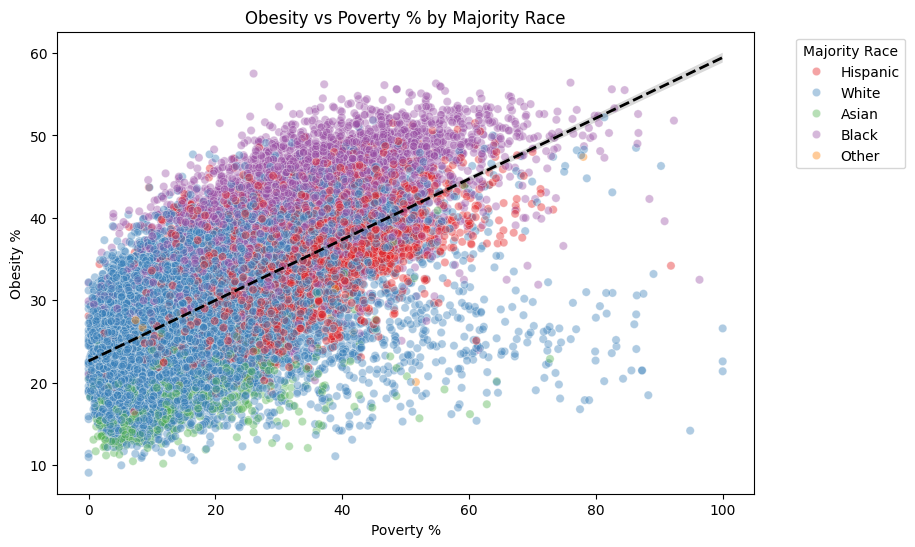

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df,
    x='Poverty_Pct', y='Obesity_Pct',
    hue='Majority_Race_Clean',
    alpha=0.4, palette='Set1'
)
sns.regplot(
    data=df, x='Poverty_Pct', y='Obesity_Pct',
    scatter=False, color='black', line_kws={'lw':2, 'ls':'--'}
)

plt.title("Obesity vs Poverty % by Majority Race")
plt.xlabel("Poverty %")
plt.ylabel("Obesity %")
plt.legend(title="Majority Race", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


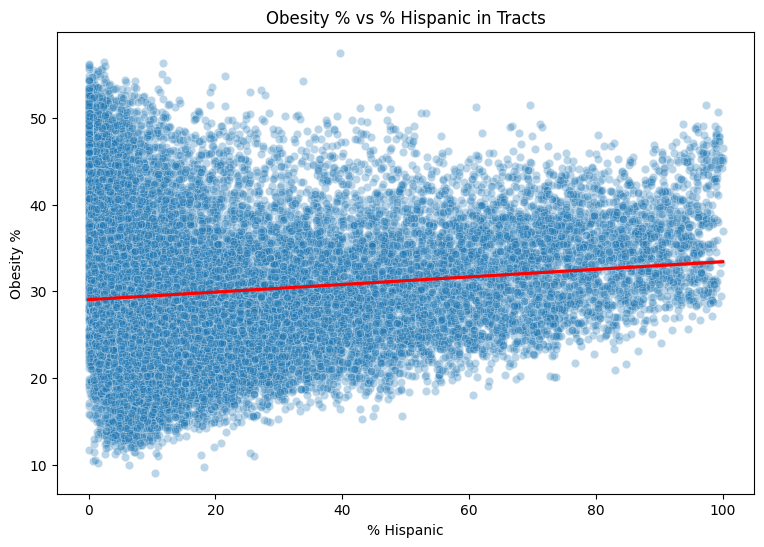

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='Pct_Hispanic', y='Obesity_Pct', alpha=0.3)
sns.regplot(data=df, x='Pct_Hispanic', y='Obesity_Pct',
            scatter=False, color='red')
plt.title('Obesity % vs % Hispanic in Tracts')
plt.xlabel('% Hispanic'); plt.ylabel('Obesity %')
plt.show()


/var/folders/kt/_bzbz3vd5qbcfjnt5vssmqxh0000gn/T/ipykernel_60192/743058794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_obesity, x='Majority_Race_Clean', y='Obesity_Pct',


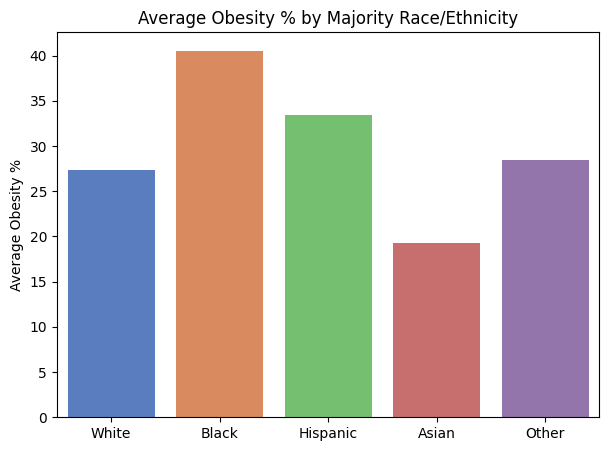

In [16]:
mean_obesity = df.groupby('Majority_Race_Clean')['Obesity_Pct'].mean().reset_index()
order = ['White','Black','Hispanic','Asian','Other']


plt.figure(figsize=(7,5))
sns.barplot(data=mean_obesity, x='Majority_Race_Clean', y='Obesity_Pct',
            order=order, palette="muted")
plt.title('Average Obesity % by Majority Race/Ethnicity')
plt.xlabel(''); plt.ylabel('Average Obesity %')
plt.show()


/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/janak/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


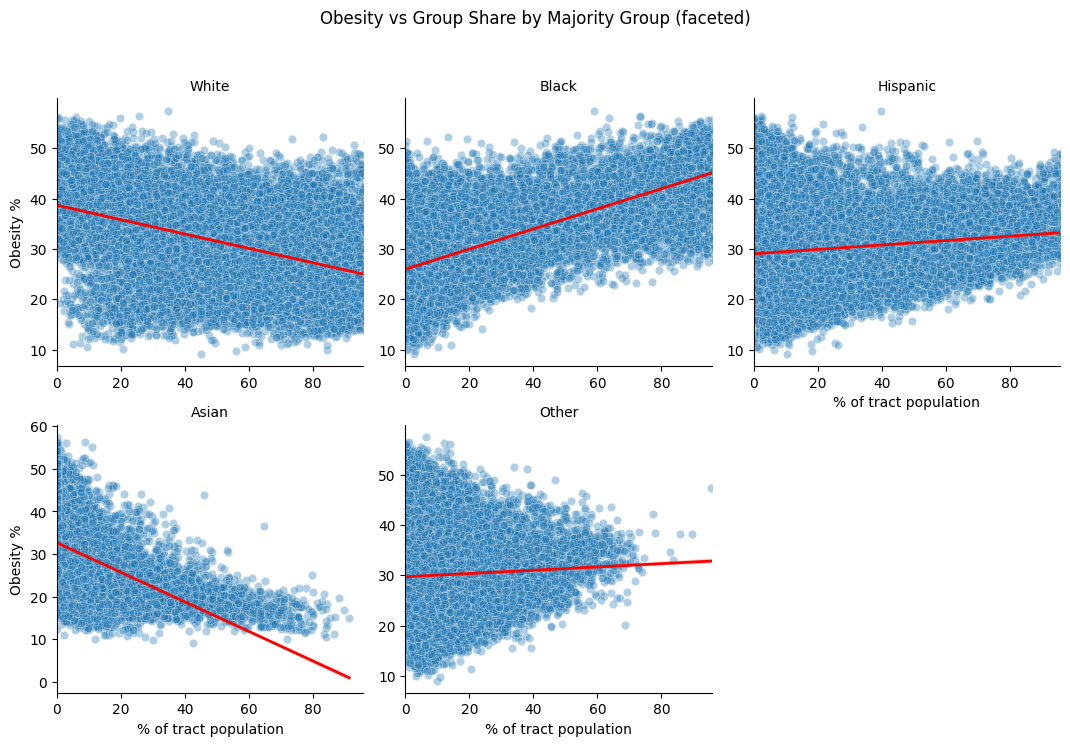

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pick the shares you want to facet
share_cols = {
    'White':    'Pct_White_Alone',
    'Black':    'Pct_Black_Alone',
    'Hispanic': 'Pct_Hispanic',
    'Asian':    'Pct_Asian_Alone',
    'Other':    'Pct_Other',
}

# build a long/tidy dataframe: one row per (tract, group)
long_df = (
    df
      .loc[:, ['Obesity_Pct'] + list(share_cols.values())]
      .rename(columns={v:k for k,v in share_cols.items()})
      .melt(id_vars='Obesity_Pct', var_name='Group', value_name='GroupShare')
)

# (optional) trim extreme x outliers so scales are readable
xmax = long_df['GroupShare'].quantile(0.99)

g = sns.FacetGrid(long_df, col='Group', col_wrap=3, height=3.6, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='GroupShare', y='Obesity_Pct', alpha=0.35)
g.map_dataframe(sns.regplot, x='GroupShare', y='Obesity_Pct',
                scatter=False, color='red', line_kws={'lw':2})

g.set(xlim=(0, xmax))
g.set_axis_labels("% of tract population", "Obesity %")
g.set_titles(col_template="{col_name}")
plt.suptitle("Obesity vs Group Share by Majority Group (faceted)", y=1.03)
plt.tight_layout()
plt.show()


In [ ]:
race_cols = ['Pct_White_Alone','Pct_Black_Alone','Pct_Hispanic','Pct_Asian_Alone','Pct_Other']
corr = df[race_cols + ['Obesity_Pct']].corr()['Obesity_Pct']
# Measures the strength and direction of a linear relationship between two variables.
print(corr)


Pct_White_Alone   -0.472903
Pct_Black_Alone    0.659166
Pct_Hispanic       0.132324
Pct_Asian_Alone   -0.484688
Pct_Other          0.046879
Obesity_Pct        1.000000
Name: Obesity_Pct, dtype: float64


📌 How to Present It

Hypothesis slide: “Obesity prevalence differs by racial/ethnic composition of census tracts.”

Supporting analysis slides:

Boxplot → distributions differ

Faceted scatter → continuous relationships

Summary stats → clear mean differences

Poverty vs obesity scatter → disparities persist beyond SES

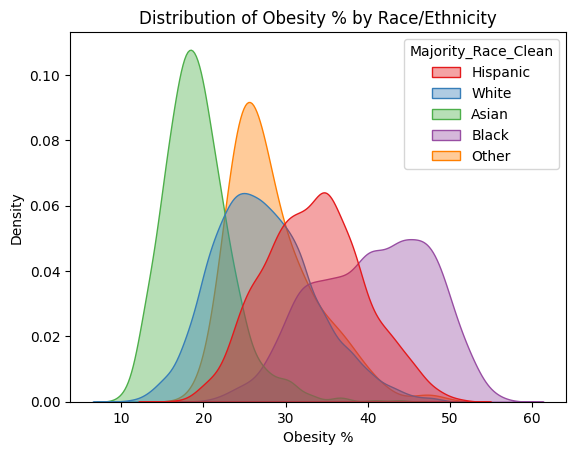

In [21]:
sns.kdeplot(data=df, x='Obesity_Pct', hue='Majority_Race_Clean',
            common_norm=False, fill=True, alpha=0.4, palette="Set1")
plt.title("Distribution of Obesity % by Race/Ethnicity")
plt.xlabel("Obesity %")
plt.show()


/var/folders/kt/_bzbz3vd5qbcfjnt5vssmqxh0000gn/T/ipykernel_60192/1371031258.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Majority_Race_Clean', y='Obesity_Pct',


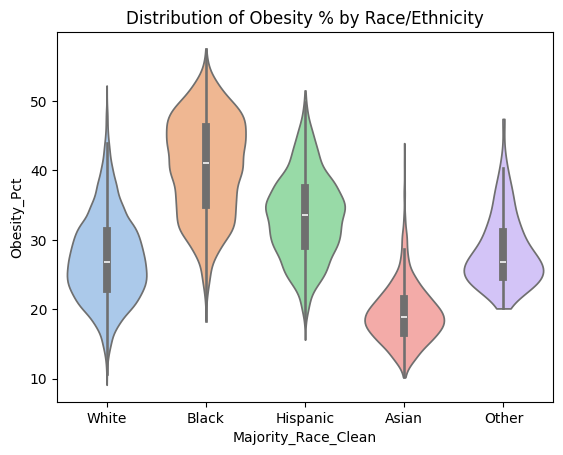

In [23]:
sns.violinplot(data=df, x='Majority_Race_Clean', y='Obesity_Pct',
               order=order, palette="pastel", cut=0)
plt.title("Distribution of Obesity % by Race/Ethnicity")
plt.show()


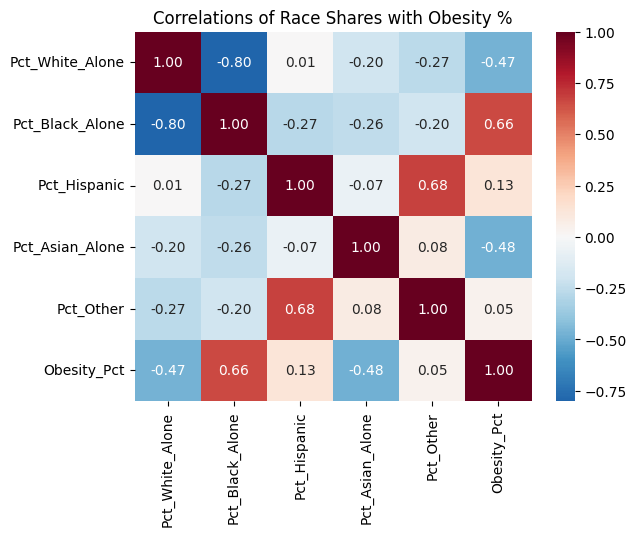

In [24]:
race_cols = ['Pct_White_Alone','Pct_Black_Alone','Pct_Hispanic','Pct_Asian_Alone','Pct_Other']
corr = df[race_cols + ['Obesity_Pct']].corr()

sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Correlations of Race Shares with Obesity %")
plt.show()
